In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print(tf.__version__)

2.10.0


In [3]:
# The following statements are used to check for the availiblity of the `gpu`.
print("GPU", "available (Yess!!!)" if tf.config.list_physical_devices("GPU") else "not available")
# print("Number of GPU's available: ", len(tf.config.experimental.list_physical_devices('GPU')))

GPU available (Yess!!!)


In [4]:
# Getting our data ready (That means turning it into Tensors)
import pandas as pd
labels_csv = pd.read_csv("C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/labels.csv")

In [5]:
labels_csv.describe()


id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

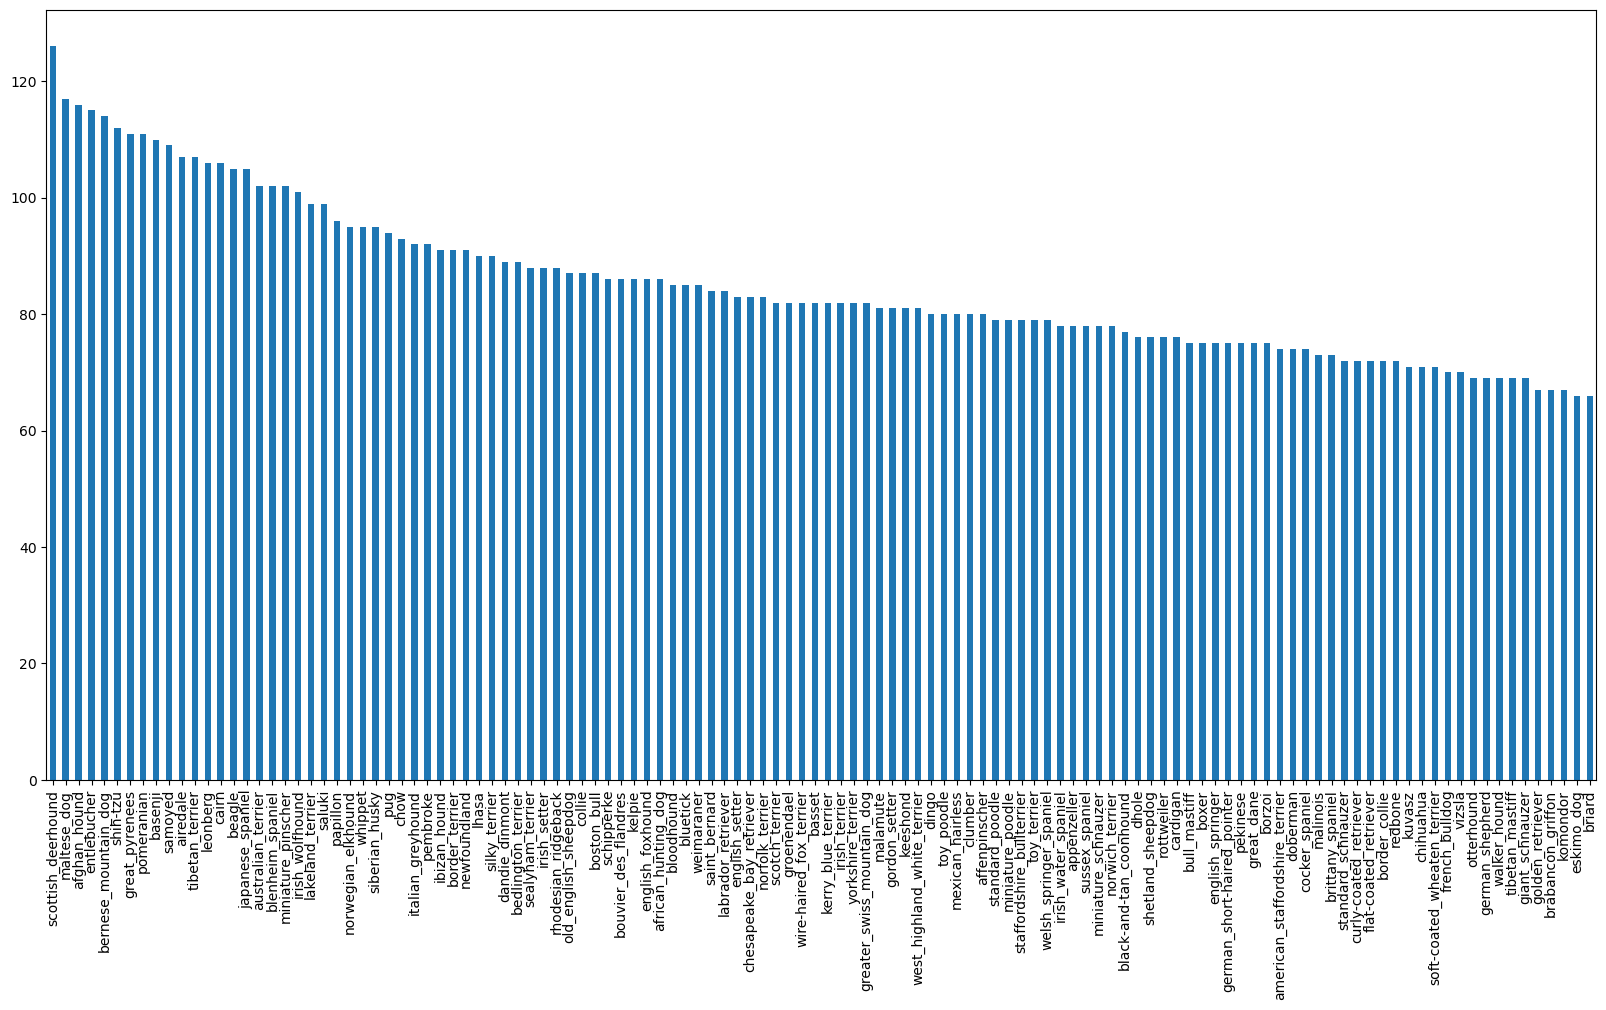

In [7]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [8]:
labels_csv['breed'].value_counts().median()

82.0

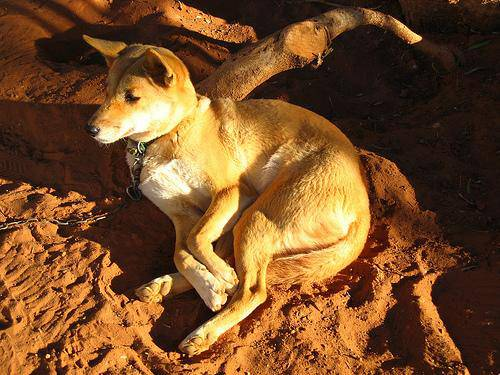

In [9]:
# Let's view an image
from IPython.display import Image
Image("C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

# Getting Images and their Labels

* let's get the list of all aour Image file pathnames

In [10]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [11]:
# Create pathnames from image ID's
# filenames = [fname for fname in labels_csv['id']]

# Filenames

In [13]:
filenames = ["C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/" + fname + ".jpg"  for fname  in labels_csv['id']]

In [14]:
filenames[:10]

['C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/t

In [15]:
# Check number of filenames mathes the number of actual number os image files.
import os
if len(os.listdir("C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/train/")) == len(filenames):
    print("Filenames match the actual amount of files!!!")
else:
    print("Filenames do not match actual amount of files, check teh target directory.")

Filenames match the actual amount of files!!!


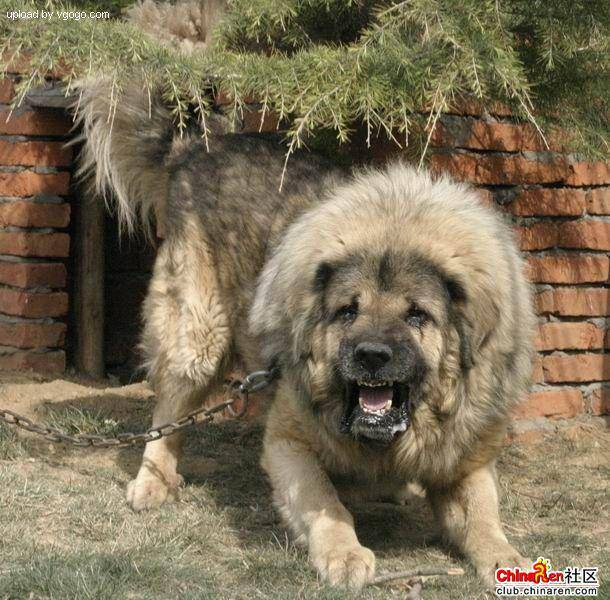

In [16]:
 # One more check
Image(filenames[9000])

In [17]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [18]:
# Now let's prepare our labels
import numpy as np
labels = labels_csv['breed'].to_numpy() # Does the same thing as below.
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(labels)

10222

In [20]:
# Check the no. of labels with the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches the number of fileneames.")
else:
    print("Num,ber of labels does not matches the number of filenames, check data directories")

Number of labels matches the number of fileneames.


In [21]:
# Find the unique  label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
len(unique_breeds)

120

In [23]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [24]:
# turn everay label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [25]:
len(boolean_labels)

10222

In [26]:
# Example: Turning boolean array into integers
print(labels[0]) # ORiginal Label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array 
print(boolean_labels[0].astype(int)) # there will be 1 where the sample labels occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own Validation set
### Validation set use case:  The validation dataset is used to                       determine when training should stop in order to avoid overfitting.
* Since, Kaggle doesn't provide us with any validation set.

In [27]:
# Setting up X and y variables
X = filenames
y = boolean_labels

## We're going to start off experimenting with ~1000 images and increase as needed. 

In [28]:
# Set numner of images to use for expeimenting
NUM_IMAGES = 1000  
# The following code is only available in google collab
# @params{type: "slider", min:1000, max:10000, step:1000} 
# step means using one batch size of training data to train the model

In [29]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

### Preproccessing Images (Turning images into Tensors)
#### To preprocess our images into Tensors we're going to write a fucntion which            does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3, Turn our image(.jpg) into Tensors
4. Normalize our image (Convert color channel values from 0-255 to 0-1 values)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`




## Before we do the above process Let's see what importing an image looks like. 

In [30]:
# Convert an image into NumPy array.
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

### (Height, Width, Colour Channel) 
### Coolour channel: R,G,B

In [31]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns tje image into a Tensor.
    """
    # Read an image file.
    image = tf.io.read_file(image_path)
    
    # Turn the Jpeg into an numerical Tensor with 3 colour channels (Re, Greem. Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the image to our desired value (224, 224).
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image
    
    
        

## Turning our data into Batches

### Why turn our data into batches?

1.) Let's say you're tryijng to process 10,000+ images in one go ... they all might no fir into memory.
2.)So that's why we do about 32(this is batch size) images at a time (you can manually adjust the batch size if need be)


In order to use TnsorFlow effectivley, we need our data in the form of Tensor tuples whcih look likes this: `(image, label)`.

In [32]:
# Create a simple function to return a tuple (image, lable)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the imahe and return a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label
    

In [33]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222887 , 0.3232816 ],
         [0.2537167 , 0.44366497, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.2972178 , 0.52466875, 0.33030325],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.45378074, 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027993 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821918, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247737],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934695]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Let's make a fucntion to turn all of our data (`X`, `y`) into batches! 

In [115]:
# Define a batch size, 32 is a good start.
BATCH_SIZE = 32

# Let's make a fucntion to turn our data into Batches!
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of images(X) and label(y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's a validation data.
    Also accepts test data as input (no labels)
    
    """
    # If the data is the test data set then we probably don't have any labels
    if test_data:
        print("Creating test dataBatches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths and no labels.
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # If the data is the valid dataset, we don't need to shuffle it.
    elif valid_data:
        print("Creating validation data batches....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),   # filepaths
                                                   tf.constant(y)))  # Labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    
    else:
        print("Creating training data bathes...")
        # Turn filepaths and lables into Tensors.
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathanmes and labels before mapping image, processor function is faster than shuffling images.
        data = data.shuffle(buffer_size=len(X))  # buffer_size: how many variables do we wanna shuffle.
        
        # Create (image, label) tuple (This also turns an image path into a preprocessed image)
        data = data.map(get_image_label)
        
        # Turn the training data into batches.
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [35]:
# Create Training and valiation data bachtes
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data bathes...
Creating validation data batches....


In [36]:
# Let's check out differnt attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize our data

Our data is now in batches, however,these can be a little hard to understand/comprehend, Let's visiualize them! 

In [37]:
import matplotlib.pyplot as plt

# Create a function for viewing images into data batches.
def show_25_images(images, labels):
    """
        Displays a plot 25 images and their labels from a data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Ad the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")
        # The above statement removes the axis info from all the images in the below images grid.

In [38]:
# Unbatching to visualize
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels



(array([[[[2.84698188e-01, 4.05900538e-01, 1.46822006e-01],
          [2.05500275e-01, 3.24898809e-01, 8.58622491e-02],
          [2.51533926e-01, 3.63373816e-01, 1.70737833e-01],
          ...,
          [8.39504123e-01, 7.17935562e-01, 5.45386434e-01],
          [7.31041074e-01, 6.01629317e-01, 4.33001816e-01],
          [5.70858896e-01, 4.41447139e-01, 2.72819698e-01]],
 
         [[1.63377792e-01, 2.76889205e-01, 2.25207116e-03],
          [2.03945354e-01, 3.14505279e-01, 3.88468020e-02],
          [2.08259463e-01, 3.19312721e-01, 7.17024207e-02],
          ...,
          [9.97839630e-01, 8.73116255e-01, 7.07815051e-01],
          [9.96273696e-01, 8.70468080e-01, 7.05762148e-01],
          [9.71631944e-01, 8.34377050e-01, 6.69671118e-01]],
 
         [[2.77913541e-01, 3.73547643e-01, 4.11345772e-02],
          [2.64192104e-01, 3.62890273e-01, 4.83251959e-02],
          [3.68784845e-01, 4.61738259e-01, 1.66971028e-01],
          ...,
          [9.71242726e-01, 8.26144695e-01, 6.6143

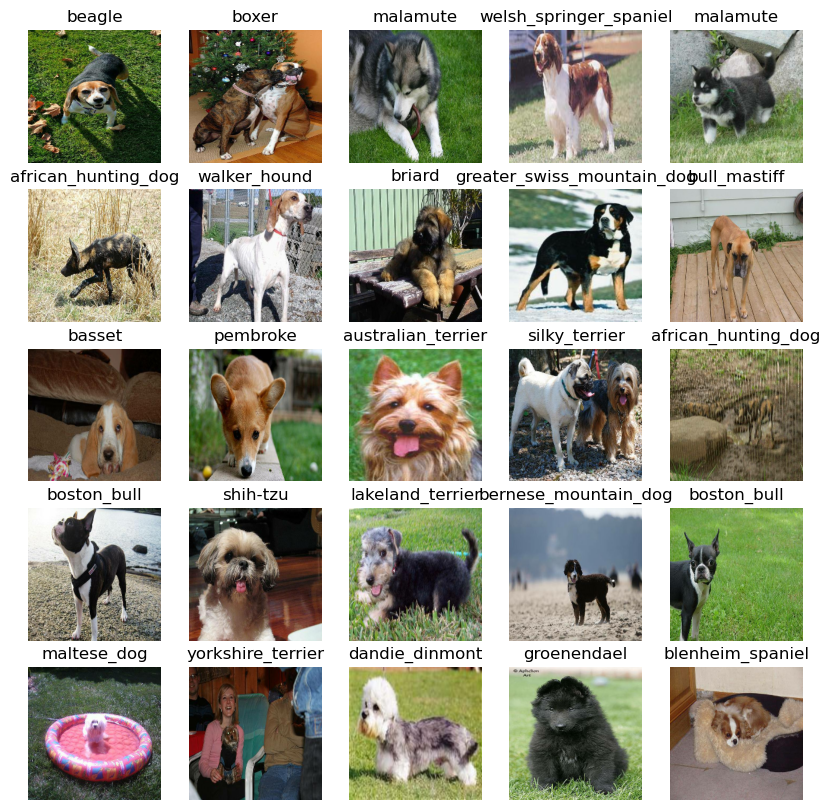

In [39]:
# Let's visualize the data in a training batch
show_25_images(train_images, train_labels)

In [40]:
# Now let's visualize our validation set.
val_images, val_labels = next(val_data.as_numpy_iterator())
val_images, val_labels

(array([[[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
 
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
 
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
 
         ...,
 
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.99153

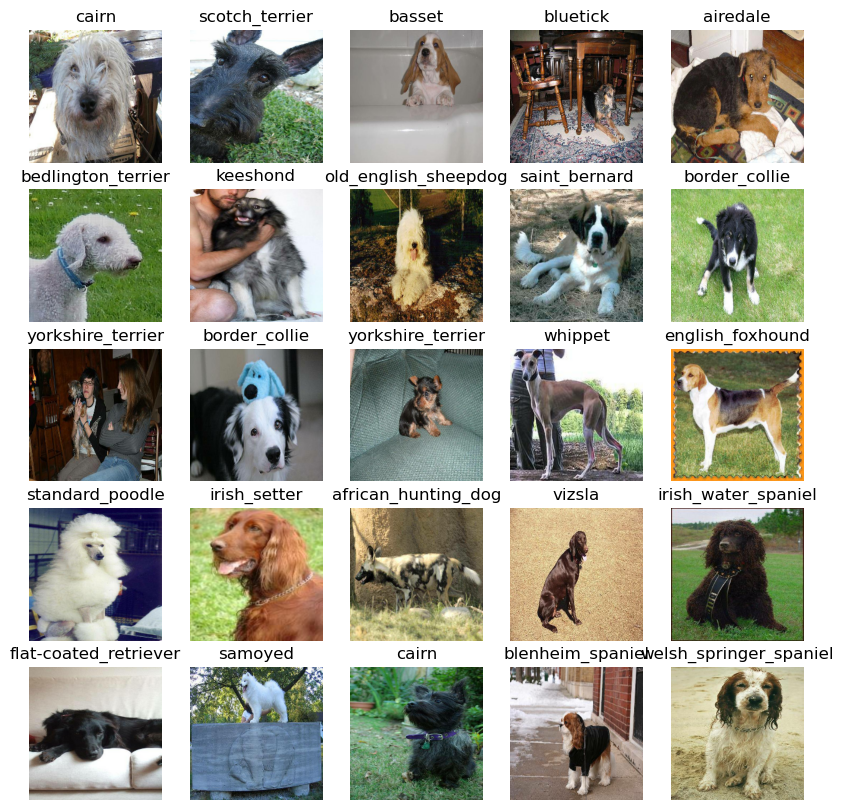

In [41]:
show_25_images(val_images, val_labels)

## Building A  Model 

* The input shape(our images shape, in the form of Tensors) to our model.
* The ouput shape (image labels, in the form of Tensors) of our model.
- The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5.

In [42]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels.

# Setup output shape of our model.
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub.
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go.
Let's pu them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, ouput shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compiles the model (says how it should be evaluates and improved)
* Build the model (tells the model the input shape it'l be getting)
* Returns the model.

All of these stpes can be found here: https://www.tensorflow.org/guide/keras/overview

In [43]:
# Create a function which builds a Keras Model.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building the model using: ", MODEL_URL)
    
    # Setup the model Layers
    model = tf.keras.Sequential([
                                  hub.KerasLayer(MODEL_URL), # Layer 1 (input Layer)   
                                  tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                          activation="softmax") # Layer 2 (output Layer)
    ])
    
    # Compile the Model.
    model.compile(
                   loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"]
    )
    
    # Build the model.
    model.build(INPUT_SHAPE)
    
    return model

In [44]:
model = create_model()
model.summary()

Building the model using:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating  Callbacks

callbacks are helper functions , a  model can use during training to do such things as save it's progress, check it's progress or stop training early if a model model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback 

To setup a TensorBoard callback, we need to do 3 things:
* Load the TensorBoard notebook extension.
* Create a tensorBoard callback which is able to save the logs to a dirctory and pass it to our model's `fit()` function.
* Visualize our model's training loga with the `%tensorboard` magic function (Will be done after model training).

In [45]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [46]:
import datetime

# Create a function to nuild a TensorBoard callback.
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard  logs.
    logdir = os.path.join("C:/Users/Vishwajeet/Deep_Learning-DogVision/logs/DL-1-DogVision_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))# MAke it so the logs get tracked wherever we run an experiment.
    
    return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback 

Early stopping helps our model from overfitting by stopping training if certain evaluation metric stops improving.

In [47]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training our Model (on subset of data)

In [48]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max100, step:10}


In [49]:
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Let's create a function that trains our model.

* Create a model using `create_model()`.
* Setup the TensorBoard callback using `create_tensorBoard_callback()`.
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for(i.e `NUM_EPOCHS`) and the callbacks that we'd like to use.
* eturn the model.


In [50]:
# Build a function to train and return the trained model.
def train_model():
    # Create a model
    model = create_model()
    # Create new TensorBoard session everytime we train a model.
    tensorboard = create_tensorboard_callback()
    
    # Fit the model to the data passinf it to the callbacks we created.
    model.fit(x=train_data,
               epochs=NUM_EPOCHS,
               validation_data=val_data,
               validation_freq=1,
               callbacks=[tensorboard, early_stopping])
    return model

In [51]:
# Fit the model to the data.
model = train_model()

## Checking the TensorBoard Logs

The TensorBoard magic fumction (`%tensorboard`) will access the logs we created erailer an visualize it's contents.

In [52]:
%tensorboard --logdir C:/Users/Vishwajeet/Deep_Learning-DogVision/logs/DL-1-DogVision_logs # --host 127.0.0.1

# Making and  evaluating predictions using a trained model.

In [53]:
# Make predictions on hte validatoin data (not used to trained on).

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 107ms/step


array([[0.06800099, 0.00150334, 0.00122113, ..., 0.00043957, 0.00271328,
        0.00217251],
       [0.01374855, 0.00470485, 0.00966521, ..., 0.00607807, 0.01547921,
        0.00200321],
       [0.00215423, 0.00373186, 0.00131758, ..., 0.00279216, 0.00281684,
        0.00242734],
       ...,
       [0.00315566, 0.00986279, 0.0009147 , ..., 0.00464741, 0.00054188,
        0.00090283],
       [0.0067697 , 0.00253251, 0.00460116, ..., 0.00389595, 0.0007854 ,
        0.00353959],
       [0.00261237, 0.0058097 , 0.01509474, ..., 0.00338675, 0.0049833 ,
        0.0013856 ]], dtype=float32)

In [54]:
predictions.shape

(200, 120)

2oo--> Validation set.
120--> length of the array of images.

In [55]:
predictions[0] 
# This will return the first image from the predictions.
# The hieghst value of the following array will correspond to the index the label that the model thinks is most likely.

array([0.06800099, 0.00150334, 0.00122113, 0.00393835, 0.00097499,
       0.00419709, 0.00106367, 0.00020941, 0.00143794, 0.00237023,
       0.00567056, 0.01089275, 0.00493932, 0.00439668, 0.00430888,
       0.00698714, 0.00547269, 0.00079101, 0.05447529, 0.00032974,
       0.0005778 , 0.00302936, 0.04915887, 0.00448699, 0.00037096,
       0.00460334, 0.00755289, 0.00067334, 0.03711218, 0.00044085,
       0.00541233, 0.00463043, 0.00123386, 0.00049702, 0.00568699,
       0.00386592, 0.01609624, 0.04751873, 0.0040739 , 0.00935444,
       0.00162356, 0.00157742, 0.00049483, 0.01101929, 0.01920076,
       0.01310857, 0.0050696 , 0.00119098, 0.00369092, 0.00935415,
       0.00172501, 0.00082925, 0.00544823, 0.00382397, 0.01657132,
       0.00071967, 0.00195384, 0.00209772, 0.00824045, 0.00198232,
       0.00111715, 0.00041675, 0.01098029, 0.0005655 , 0.00064331,
       0.00275607, 0.00203921, 0.13472617, 0.00360716, 0.01176621,
       0.00030382, 0.00077646, 0.00522306, 0.00353155, 0.01190

In [56]:
len(predictions[0])

120

In [57]:
# First prediction
# We will find the maximum value from the predictions[0] array.
index = 26
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[index])]}")

[0.00066115 0.00350872 0.00088729 0.00526591 0.01188462 0.00853057
 0.00522895 0.00308084 0.00480423 0.00256662 0.00605753 0.00139181
 0.00302478 0.00434505 0.00072857 0.00516385 0.00797908 0.00155781
 0.01416184 0.00406491 0.00206565 0.01508559 0.02131625 0.00343201
 0.00331932 0.00030718 0.01158427 0.00905976 0.00958337 0.0044423
 0.01758916 0.00315912 0.00925417 0.0388636  0.00183841 0.02947175
 0.03515526 0.01466091 0.00222505 0.0010945  0.00431741 0.01024601
 0.0005968  0.00172821 0.01190681 0.00336587 0.00364989 0.0016615
 0.01157678 0.00081349 0.00807488 0.00361641 0.00776389 0.0011771
 0.00238578 0.00160159 0.00060512 0.00763139 0.00595402 0.00320342
 0.0212517  0.00783806 0.0012541  0.00150239 0.02148462 0.00624321
 0.00490731 0.16475268 0.00312666 0.00195475 0.00374454 0.0027574
 0.00065503 0.01029029 0.00536754 0.00104701 0.00419263 0.00889361
 0.00697556 0.0007048  0.00087066 0.01203044 0.00081593 0.00203122
 0.00179137 0.00823594 0.01073013 0.00436009 0.02021966 0.01214437

In [58]:
unique_breeds[65]

'komondor'

Having the above functionality is great but we wasnt to be able to do it at scale.

And it would even better if we could see the image prediction is being made on!

**Note**: Prediction probabilities are also known as confidence levels.

In [59]:
# Turn probabilities into their respective label (esaier to understand)
def get_pred_label(prediction_probabilities):
    """
        Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array pf presiction probabilities.
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

**Our validation dataset is still in batch dataset,
we'll have to unbatchify it to make predictions on the ,
validation images and compare those predictions to the validation labels (truth labels).**

In [60]:
# Create a function to unbatch a dataset.
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Rensors and returns separate arrays of images and labels.
    """
    labels= []
    images=[]
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    
    return images, labels

# unbatchify  the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make fucntion to make these all a bit more visual.

We'll create a function which :
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integer.
* Convert the preiction probabilities to a predicted a label.
* Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.

In [61]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for samplw n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n] 
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    #  Change the plot title to be predicted, probability of the predicted truth label.
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

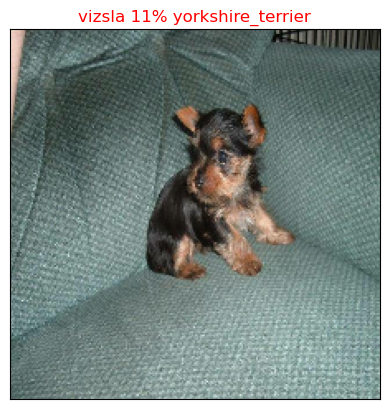

In [62]:
plot_pred(prediction_probabilities=predictions,
         labels=val_labels,
         images=val_images,
         n=12)

Now we've got one function to visualize oue models top prediction, let's make another to view our model top 10 predictions.

This function will: 
* Take an  input of prediction probabilities array and a gound truth array and an integer.
* Find the prediction using `get_pred_label`
* Find the top 10:
    * Prediction probabilities indexes.
    * Prediction probabilities values.
    * Prediction labels.
* Plot the top 10 prediction probabilities values and labels, colouring the true value green.

In [63]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 hieghest prediction confidences along with the truth label for sample n.
    """
    
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    # Get the predicted label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    
    # Find the top 10 prediction confidence values.
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 prediction confidence labels.
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), # X- values
                                      top_10_pred_values,
                                      color = "grey") 
    plt.xticks(np.arange(len(top_10_pred_labels)), # This line is used to write names of the labels in the X- axis.
                              labels = top_10_pred_labels,
                              rotation = "vertical")  
    
    # Change the colour of the true value
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass
    

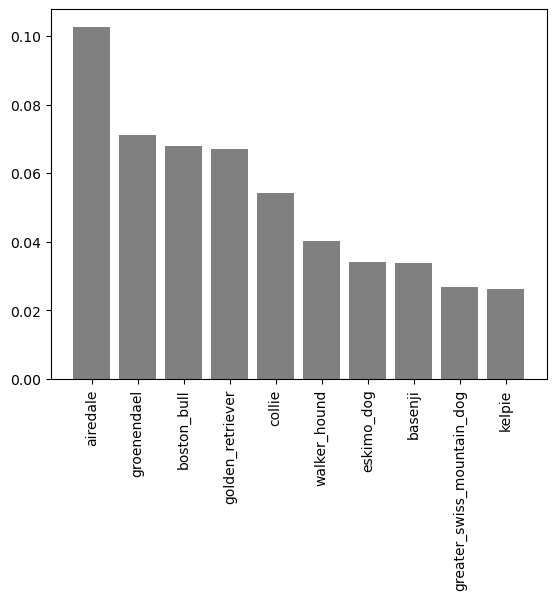

In [64]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
                n=9)

In [65]:
# Top 10 negative indexes
#predictions[0].argsort()[-10:][::-1] # here [::-1] is used to get the ouptut in the descending order.

In [66]:
#predictions[0].max()

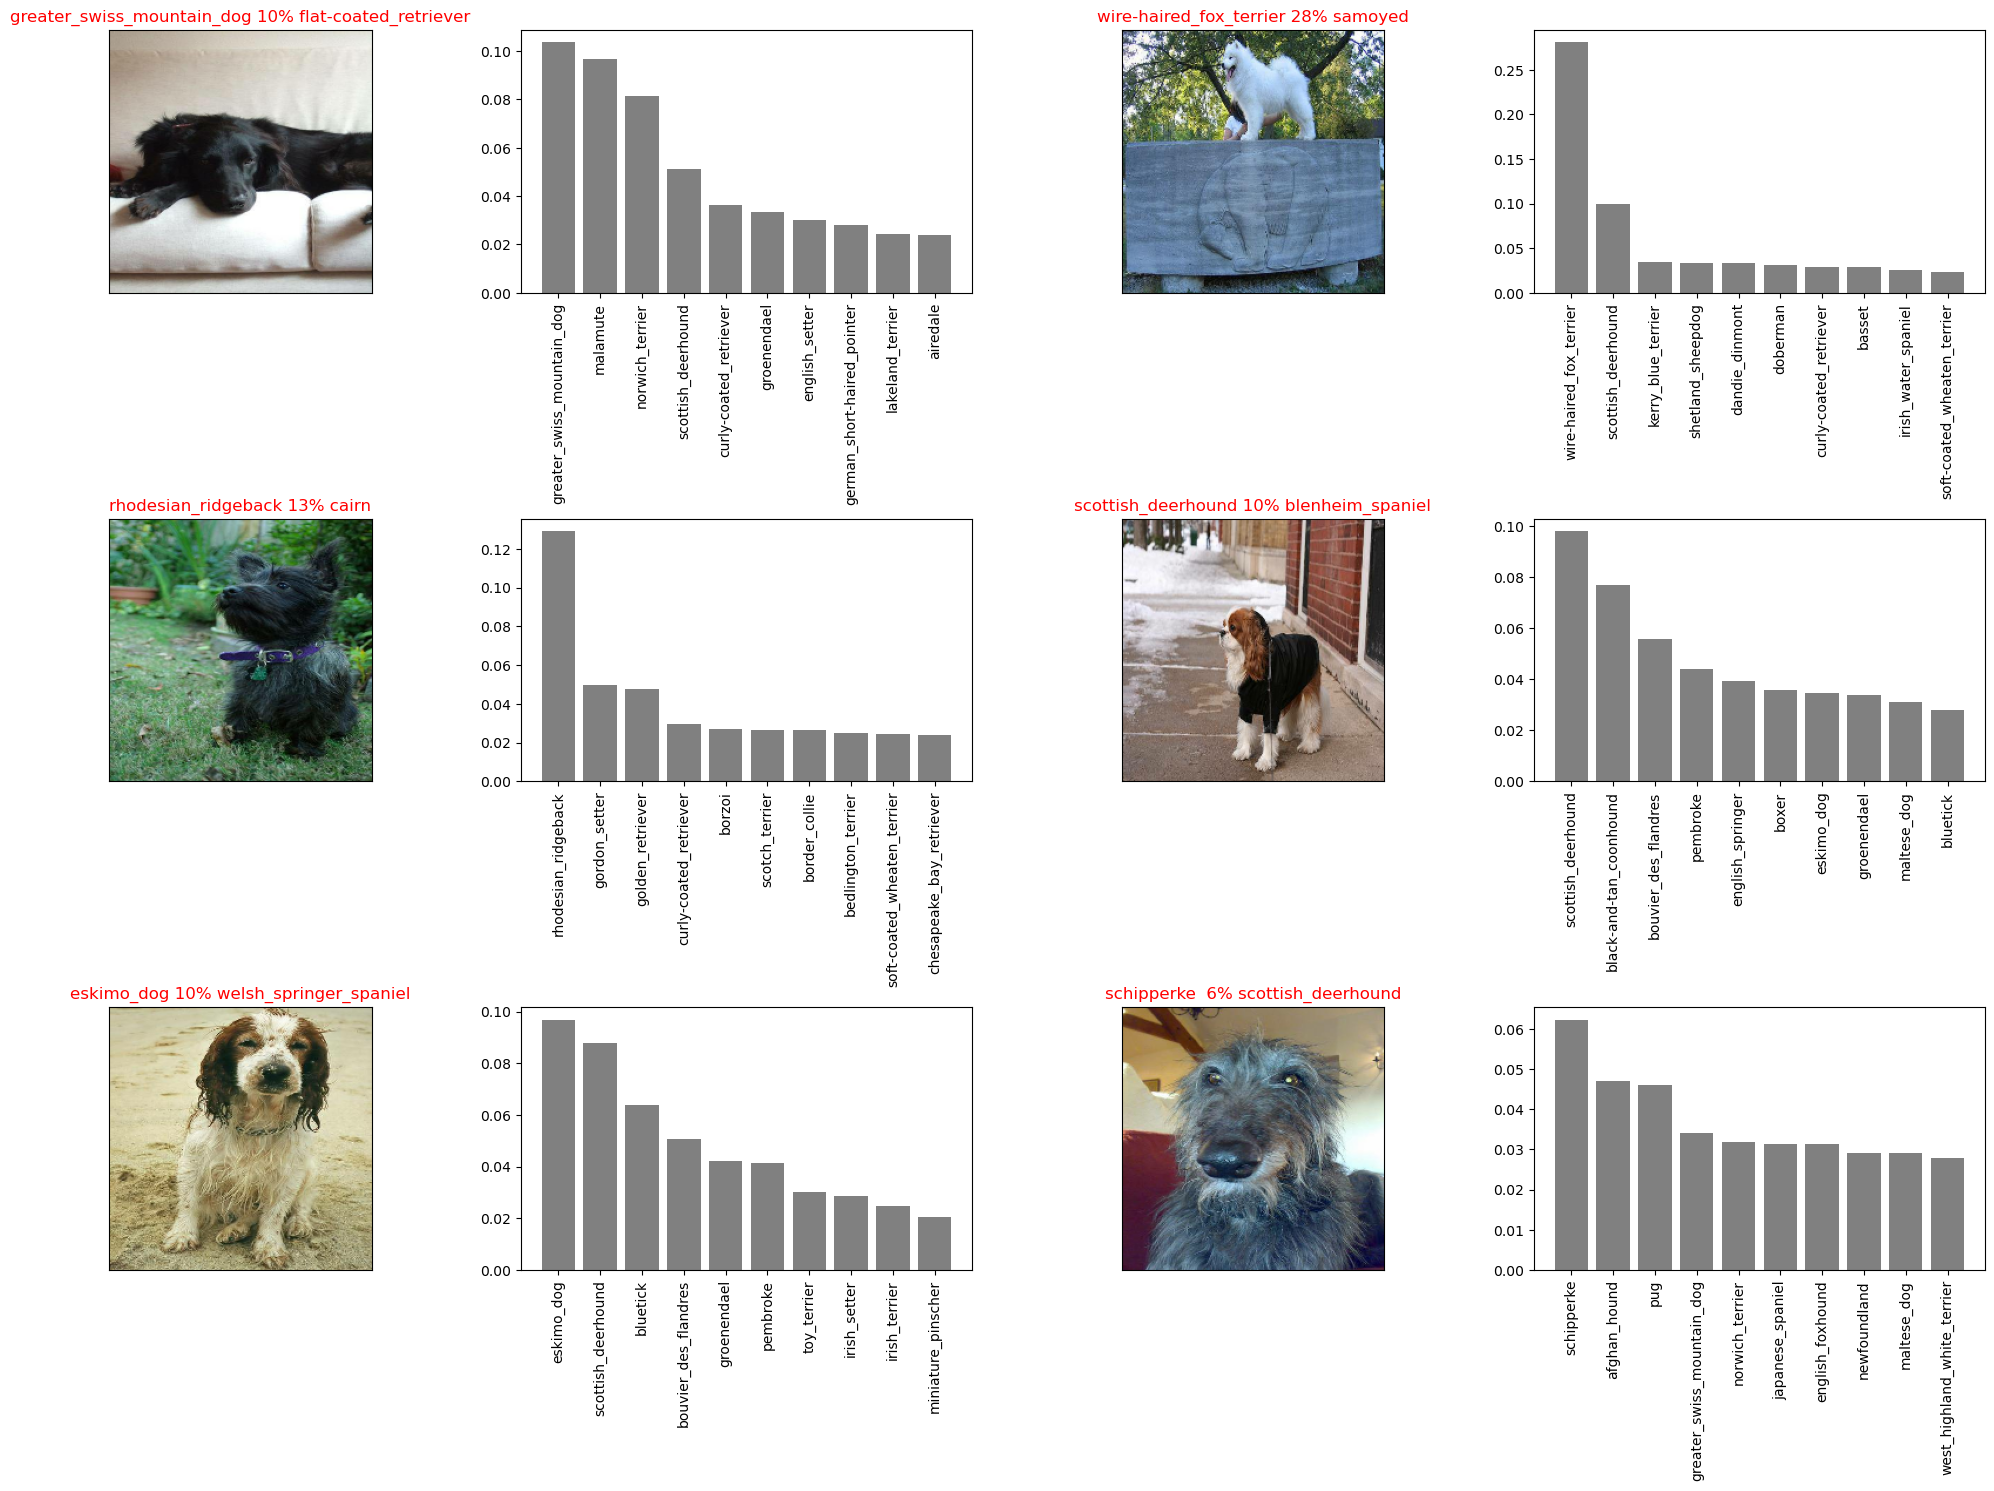

In [67]:
# Let's check out a few predictions and their different values.
# %matplotlib inline 
# import matplotlib.pyplot as plt
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels = val_labels,
              images = val_images,
              n=i+i_multiplier) 
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
# n --> no. of the index of the image we want.

## Saving and reloding a trained model


In [94]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
    Saves a given model in  a models directory and appends a suffix (String).
    """
    # Create a model directory pathnames and current time.
    # modeldir = os.path.join("C:/Users/Vishwajeet/Deep_Learning-DogVision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
    # The above was the original code written by the instructer....
    modeldir = os.path.join("C:/Users/Vishwajeet/Deep_Learning-DogVision/models","")
    
    model_path = modeldir + "-" + suffix + ".h5"  
# h5 --> save the format model.(HDF55)
    print(f"Saving model to: {model_path}...")
    
    model.save(model_path)
    
    return model_path

In [98]:
# Create a function to load model
def load_model(model_path):
    """
    Load a saved model froma  specified path.
    """
    print(f"Loading a saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [96]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: C:/Users/Vishwajeet/Deep_Learning-DogVision/models\-1000-images-mobilenetv2-Adam.h5...


'C:/Users/Vishwajeet/Deep_Learning-DogVision/models\\-1000-images-mobilenetv2-Adam.h5'

In [99]:
# Load a trained model
loaded_1000_image_model = load_model('C:/Users/Vishwajeet/Deep_Learning-DogVision/models\\-1000-images-mobilenetv2-Adam.h5')

Loading a saved model from: C:/Users/Vishwajeet/Deep_Learning-DogVision/models\-1000-images-mobilenetv2-Adam.h5


In [100]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 97ms/step - loss: 5.8187 - accuracy: 0.0150


[5.81870698928833, 0.014999999664723873]

In [101]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 100ms/step - loss: 5.8187 - accuracy: 0.0150


[5.81870698928833, 0.014999999664723873]

## Training our model on FullDataset 

In [105]:
# Filenames , Labels
len(X), len(y) 

(10222, 10222)

In [106]:
# Create a data batch with a full dataset.
full_data = create_data_batches(X, y)

Creating training data bathes...


In [107]:
# Create a model for full model
full_model = create_model()

Building the model using:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [108]:
# Create full model caallbacks
full_model_tensorboard = create_tensorboard_callback()
# NO Validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3) # No. of epochs.

## **NOTE:** Runnind the cell below will take a while (maybe upto 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [109]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 41s 116ms/step - loss: 1.3491 - accuracy: 0.6693
Epoch 2/100
320/320 [==============================] - 39s 121ms/step - loss: 0.4003 - accuracy: 0.8824
Epoch 3/100
320/320 [==============================] - 39s 122ms/step - loss: 0.2360 - accuracy: 0.9332
Epoch 4/100
320/320 [==============================] - 38s 118ms/step - loss: 0.1544 - accuracy: 0.9612
Epoch 5/100
320/320 [==============================] - 38s 120ms/step - loss: 0.1055 - accuracy: 0.9791
Epoch 6/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0770 - accuracy: 0.9878
Epoch 7/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0597 - accuracy: 0.9903
Epoch 8/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0473 - accuracy: 0.9938
Epoch 9/100
320/320 [==============================] - 39s 121ms/step - loss: 0.0369 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 39s 121m

In [110]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: C:/Users/Vishwajeet/Deep_Learning-DogVision/models\-full-image-set-mobilenetv2-Adam.h5...


'C:/Users/Vishwajeet/Deep_Learning-DogVision/models\\-full-image-set-mobilenetv2-Adam.h5'

In [120]:
# Load in the full model
loaded_full_model = load_model('C:/Users/Vishwajeet/Deep_Learning-DogVision/models\\-full-image-set-mobilenetv2-Adam.h5')

Loading a saved model from: C:/Users/Vishwajeet/Deep_Learning-DogVision/models\-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset 

Since our model is trained on images in the form of Tensor bathces, to make predictions on the test data, we'll have to get it into the same format.

To make predictions on the test data, we'll
* Get the test image file names.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have any labels).
* Make a predictions array by passing the test batches to the `predict()` methos called on out model.

In [122]:
# Load test image filenames
test_path = "C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/dog-breed-identification/test/002f

In [123]:
# Create Test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test dataBatches...


In [124]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

## Calling `predict()` on our full model and passing it the test batch will/might take a long time to run  

In [125]:
# Make predictions on test data using loaded full model.
test_predictions =loaded_full_model.predict(test_data, 
                                            verbose=1)

324/324 [==============================] - 36s 110ms/step


In [127]:
# Save predictions (NumPy) to csv file (for access later)
np.savetxt("C:/Users/Vishwajeet/Deep_Learning-DogVision/preds_array.csv", test_predictions, delimiter=",")

In [128]:
# Load the predictions (NumPy array) from csv file.
test_predictions = np.loadtxt("C:/Users/Vishwajeet/Deep_Learning-DogVision/preds_array.csv", delimiter=",")

In [129]:
test_predictions[:10]

array([[4.52373590e-11, 6.45259757e-12, 2.86644047e-14, ...,
        1.63316870e-13, 3.39563849e-10, 7.18384770e-12],
       [4.05929995e-06, 1.80590064e-06, 4.84978884e-08, ...,
        6.65188529e-11, 4.61424008e-07, 3.86418275e-09],
       [9.71495939e-11, 6.47545505e-07, 6.17352347e-09, ...,
        4.04272578e-06, 8.07420519e-10, 4.42143717e-11],
       ...,
       [5.10771470e-09, 3.34710121e-10, 2.03107475e-10, ...,
        8.39600004e-12, 6.27957616e-11, 4.23605567e-10],
       [5.92370528e-11, 3.98203415e-10, 6.52295926e-11, ...,
        9.82040206e-07, 7.07550951e-09, 2.25863842e-10],
       [1.47562220e-08, 3.73055371e-11, 2.92719911e-11, ...,
        5.57836329e-13, 5.31032648e-11, 2.69059868e-08]])

In [130]:
test_predictions.shape

(10357, 120)

In the above tuple--> (no. of images, no. of prediction probabilities for each image)

## Preparing test dataset predictions  for Kaggle

looking at the Kaggle sample submission, we find that it wants pour prediction probability outputs in a DataFrame with an ID column for each different god breed.

**NOTE:** Check the DogVision folder --> sample-submissions to see the format.


To get the data in the desired format:
* Create a pandas DataFrame with an ID column as well as a column for each dog breeds.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the predictions probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [131]:
# Create a pandas DatFrame with empty columns
preds_df = pd.DataFrame(columns=["id"]+ list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [133]:
# Append test image ID's to predictions DataFrame.
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [134]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [135]:
# Add prediction probabilities to each dog breed column.
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   4.523736e-11  6.452598e-12   
1  00102ee9d8eb90812350685311fe5890   4.059300e-06  1.805901e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   9.714959e-11  6.475455e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   5.026491e-06  4.830214e-07   
4  001a5f3114548acdefa3d4da05474c2e   1.037171e-04  7.865786e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.866440e-14  4.986025e-14                    7.965604e-13   
1         4.849789e-08  4.392879e-09                    2.613655e-06   
2         6.173523e-09  3.940289e-11                    9.595684e-11   
3         1.770120e-07  4.875741e-06                    1.361796e-05   
4         1.100569e-08  7.970711e-10                    6.757520e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.252969e-11        1.310812e-16  4.127976e-13  1.404419e-13  ...   
1  3.001779e-08        1.263832e-06  1.606072e-06  8.042718e-09  ...   
2  4.340301e-09        7.222109e-11  2.398794e-11  3.022820e-09  ...   
3  2.222650e-07        8.464601e-11  1.798931e-08  4.711153e-08  ...   
4  2.724323e-11        4.420619e-10  3.044418e-09  1.830064e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  6.667272e-13  2.200795e-13  1.104864e-13  1.161088e-14  2.264720e-14   
1  5.248688e-08  1.015409e-06  6.217472e-09  3.794773e-06  2.443366e-07   
2  4.066495e-12  9.501133e-11  5.464248e-08  4.550884e-07  9.439881e-08   
3  1.393510e-06  1.026637e-09  1.997822e-06  2.207837e-09  2.374754e-07   
4  2.432165e-07  1.216848e-10  2.006310e-10  3.292063e-11  5.977000e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            7.907726e-13                 2.804192e-13  1.633169e-13   
1            5.777905e-07                 9.009844e-04  6.651885e-11   
2            4.755631e-08                 8.903253e-12  4.042726e-06   
3            1.311662e-09                 2.309257e-14  9.035590e-03   
4            8.015634e-10                 2.690949e-10  4.002691e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             3.395638e-10       7.183848e-12  
1             4.614240e-07       3.864183e-09  
2             8.074205e-10       4.421437e-11  
3             2.109338e-10       1.152942e-08  
4             1.372627e-09       4.448097e-08  

[5 rows x 121 columns]

In [136]:
# Save our predictions dataframe to cdv for  submission to Kaggle.
preds_df.to_csv("C:/Users/Vishwajeet/Deep_Learning-DogVision/full_model_predictions_submission_1_mobilenetV2.csv",
                 index=False)
# index--> row names.

## Making predictions on custom images

To make predictions on custom image:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_dat_batches()`. And since our custom images won't have labels, we set `test_data` parameter to `True`.
* Pass the custom image to our data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.


In [137]:
# Get the custom image filepaths.
custom_path = "C:/Users/Vishwajeet/Deep_Learning-DogVision/Custom-dogs-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]


In [138]:
custom_image_paths

['C:/Users/Vishwajeet/Deep_Learning-DogVision/Custom-dogs-images/Untitled.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/Custom-dogs-images/Untitled_1.jpg',
 'C:/Users/Vishwajeet/Deep_Learning-DogVision/Custom-dogs-images/Untitled_3.jpg']

In [139]:
# Turn customm images into batch dataset.
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test dataBatches...


In [140]:
# Making predictions on the custom data.
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 141ms/step


In [141]:
custom_preds.shape

(3, 120)

(no. of images, no. pred probabilities for each image)

In [144]:
# Get custom image prediction labels.
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [145]:
custom_pred_labels

['german_shepherd', 'appenzeller', 'boxer']

In [146]:
# Get custom images (our unbatchify() fucntion won't work since there aren't any labels .... maybe we could fix this later).
custom_images = []
# Loop through unbatched data.
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

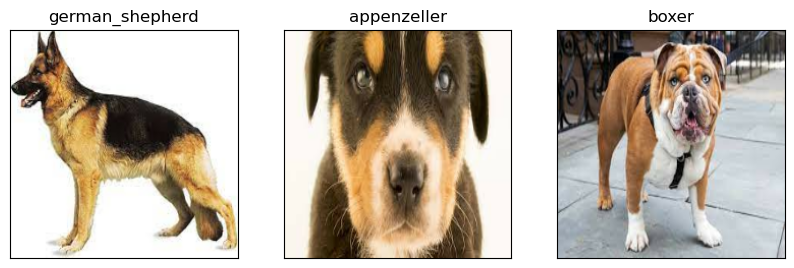

In [149]:
# Check custom image predictions.
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(1, 3, i+1)
    # (1 row, 3 columns, index of our subplot)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)